In [1]:
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

In [2]:
beta = 4.0
nbpts = 10000
xstart, xend = 0.0, 1.0
nsteps = 100000

In [5]:
@nb.njit(nb.float64[:](nb.float64, nb.int32, nb.float64, nb.float64))
def levy_free_path(beta, nbpts, xstart, xend):
    dtau = beta / nbpts
    x = np.zeros(nbpts+1)
    x[0] = xstart
    x[nbpts] = xend

    for k in range(1, nbpts):
        dtau_prime = (nbpts - k) * dtau
        meanxk = (dtau_prime * x[k-1] + dtau * x[nbpts]) / (dtau + dtau_prime)
        sigma = np.reciprocal(np.sqrt(1/dtau + 1/dtau_prime))
        x[k] = np.random.normal(meanxk, sigma)
        
    return x

In [10]:
x = np.zeros((nsteps, nbpts+1))
for step in range(nsteps):
    x[step, :] = levy_free_path(beta, nbpts, xstart, xend)

(array([1.3000e+01, 2.3800e+02, 2.6030e+03, 1.3640e+04, 3.1277e+04,
        3.2968e+04, 1.5521e+04, 3.3790e+03, 3.5100e+02, 1.0000e+01]),
 array([-4.17199747, -3.24886081, -2.32572416, -1.4025875 , -0.47945084,
         0.44368581,  1.36682247,  2.28995913,  3.21309579,  4.13623244,
         5.0593691 ]),
 <BarContainer object of 10 artists>)

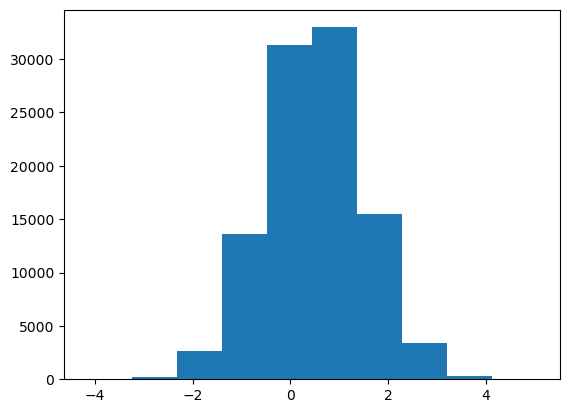

In [14]:
plt.hist(x[:, nbpts//2])